 # YOLOv8 Drowsiness Classification
 [GitHub repo link](https://github.com/cubukcum/drowsiness-detection) <br>
 <a id="top"></a> <br>
## Content
1. [About YOLOv8?](#1)
2. [Dependencies](#2)
3. [Dataset](#3)
4. [Model Definition and Training](#4)
5. [Model Evaluation](#5)
6. [Model's Performance on Test Data](#6)
7. [Export Model](#7)
8. [Acknowledgements](#8)

<a id="1"></a> 
## 1. About YOLOv8?
YOLOv8 is the latest version of YOLO by Ultralytics. As a cutting-edge, state-of-the-art (SOTA) model, YOLOv8 builds on the success of previous versions, introducing new features and improvements for enhanced performance, flexibility, and efficiency. YOLOv8 supports a full range of vision AI tasks, including detection, segmentation, pose estimation, tracking, and classification. This versatility allows users to leverage YOLOv8's capabilities across diverse applications and domains.
![](https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png)

<a id="2"></a> 
## 2. Dependencies
To train YOLO model we're going to need ultralytics package, NumPy (numerical computation) and matplotlib (image processing) libraries. Also we're going to use wandb to track and visualize various aspects of our model training process in real-time. Go to https://wandb.ai and create an account if you don't have one yet. Then go to https://wandb.ai/authorize to copy your api. Navigate to Add-ons--> Secrets to open the secrets popup. click on the "Add a new secret" button and the paste the api you just copied. You can label it as you like however you need to update the code below if you don't label like me(wandb_api_key).

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 kB 20.5 MB/s eta 0:00:00


WARNING: I installed tensorflow==2.13.1 to export my model as a tflite, if you don't need to export as tflite then you don't need to run this. Default tensorflow will take care of your needs.

In [2]:
!pip install tensorflow==2.13.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 24.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import wandb
from kaggle_secrets import UserSecretsClient
from ultralytics import YOLO

In [4]:
user_secrets = UserSecretsClient()

my_secret = user_secrets.get_secret("wandb_api_key") 

wandb.login(key=my_secret)

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

<a id="3"></a>
## 3. Dataset
It is always good to check few images from the dataset. The dataset I am using here has 2 folders: train, valid.

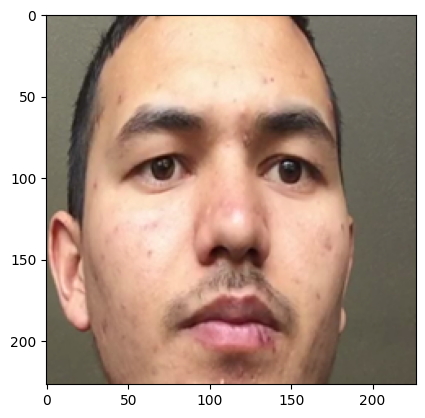

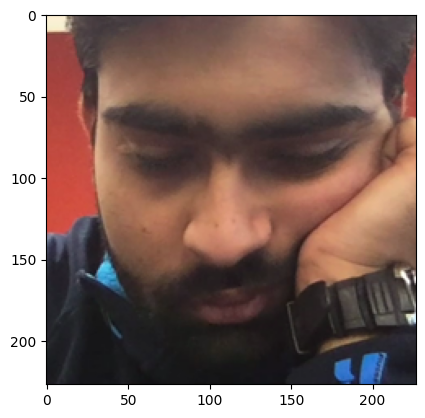

In [5]:
sample1 = mpimg.imread('/kaggle/input/driver-drowsiness/driver_drowsiness/val/Active/r0248.png')
sample2 = mpimg.imread('/kaggle/input/driver-drowsiness/driver_drowsiness/val/Fatigue/ZB0675.png')

plt.imshow(sample1)
plt.show()
plt.imshow(sample2)
plt.show()


<a id="4"></a> 
## 4. Model Definition and Training
We are going to use yolov8n-cls.pt pretrained model to save time and also resources. You can check other models here: https://github.com/ultralytics/ultralytics. We give model data.yaml location, epoch number and imgsz parameters. You should play with the epoch number to find what is appropriate for your case. Also defaut image size is 640 so it is not necessary to add it unless you want to change it.

In [6]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-cls.pt')


# Train the model
results = model.train(data='/kaggle/input/driver-drowsiness/driver_drowsiness', epochs=20, imgsz=640)

100%|██████████| 5.30M/5.30M [00:00<00:00, 102MB/s]


Ultralytics YOLOv8.2.10 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/kaggle/input/driver-drowsiness/driver_drowsiness, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

2024-05-08 12:34:26,029	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-05-08 12:34:27,380	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=1000 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralyti

wandb: Currently logged in as: m4257066 (hjty). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.0 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240508_123431-mz9xeup8
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train
wandb: ⭐️ View project at https://wandb.ai/hjty/YOLOv8
wandb: 🚀 View run at https://wandb.ai/hjty/YOLOv8/runs/mz9xeup8


AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 123MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/driver-drowsiness/driver_drowsiness/train... 37776 images, 0 corrupt: 100%|██████████| 37776/37776 [00:48<00:00, 777.13it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/driver-drowsiness/driver_drowsiness is not writeable, cache not saved.


val: Scanning /kaggle/input/driver-drowsiness/driver_drowsiness/val... 4017 images, 0 corrupt: 100%|██████████| 4017/4017 [00:05<00:00, 675.13it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/driver-drowsiness/driver_drowsiness is not writeable, cache not saved.
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/classify/train
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20      1.89G     0.7826         16        640:   0%|          | 9/2361 [00:02<05:22,  7.29it/s]

       1/20      1.89G     0.7767         16        640:   1%|          | 13/2361 [00:03<06:01,  6.49it/s]
100%|██████████| 755k/755k [00:00<00:00, 22.2MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:32<00:00,  3.89it/s]

                   all      0.881          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:32<00:00,  3.84it/s]

                   all      0.778          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:32<00:00,  3.89it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:32<00:00,  3.90it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:32<00:00,  3.94it/s]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:33<00:00,  3.80it/s]

                   all      0.664          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:32<00:00,  3.82it/s]

                   all      0.663          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:32<00:00,  3.88it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:32<00:00,  3.82it/s]

                   all      0.666          1



      Epoch    GPU_mem       loss  Instances       Size


      10/20      1.63G    0.00677         16        640: 100%|██████████| 2361/2361 [09:57<00:00,  3.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:32<00:00,  3.83it/s]

                   all      0.688          1



      Epoch    GPU_mem       loss  Instances       Size


      11/20      1.86G   0.003533         16        640: 100%|██████████| 2361/2361 [10:03<00:00,  3.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:33<00:00,  3.81it/s]

                   all      0.665          1



      Epoch    GPU_mem       loss  Instances       Size


      12/20      1.63G   0.004195         16        640: 100%|██████████| 2361/2361 [10:05<00:00,  3.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:33<00:00,  3.72it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


      13/20      1.63G   0.002647         16        640: 100%|██████████| 2361/2361 [09:58<00:00,  3.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:31<00:00,  3.99it/s]

                   all      0.676          1



      Epoch    GPU_mem       loss  Instances       Size


      14/20      1.63G   0.002352         16        640: 100%|██████████| 2361/2361 [10:07<00:00,  3.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:33<00:00,  3.80it/s]

                   all      0.697          1



      Epoch    GPU_mem       loss  Instances       Size


      15/20      1.64G   0.002518         16        640: 100%|██████████| 2361/2361 [10:08<00:00,  3.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:33<00:00,  3.72it/s]

                   all      0.678          1



      Epoch    GPU_mem       loss  Instances       Size


      16/20      1.63G   0.001573         16        640: 100%|██████████| 2361/2361 [10:08<00:00,  3.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:32<00:00,  3.86it/s]

                   all      0.672          1



      Epoch    GPU_mem       loss  Instances       Size


      17/20      1.63G   0.001605         16        640: 100%|██████████| 2361/2361 [10:09<00:00,  3.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:31<00:00,  3.94it/s]

                   all      0.697          1



      Epoch    GPU_mem       loss  Instances       Size


      18/20      1.63G   0.001366         16        640: 100%|██████████| 2361/2361 [10:04<00:00,  3.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:32<00:00,  3.90it/s]

                   all      0.693          1



      Epoch    GPU_mem       loss  Instances       Size


      19/20      1.64G  0.0008871         16        640: 100%|██████████| 2361/2361 [10:09<00:00,  3.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:31<00:00,  3.95it/s]

                   all      0.683          1



      Epoch    GPU_mem       loss  Instances       Size


      20/20      1.63G   0.001004         16        640: 100%|██████████| 2361/2361 [10:06<00:00,  3.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:32<00:00,  3.89it/s]

                   all      0.677          1



20 epochs completed in 3.513 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.2.10 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
train: /kaggle/input/driver-drowsiness/driver_drowsiness/train... found 37776 images in 2 classes ✅ 
val: /kaggle/input/driver-drowsiness/driver_drowsiness/val... found 4017 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 126/126 [00:33<00:00,  3.77it/s]


                   all      0.993          1
Speed: 0.5ms preprocess, 1.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
wandb:                  lr/pg1 ▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
wandb:                  lr/pg2 ▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
wandb:   metrics/accuracy_top1 ▆▃█▅█▁▁▅▁▂▁▁▁▂▁▁▂▂▁█
wandb:   metrics/accuracy_top5 ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:              train/loss █▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:                val/loss ▃▅▁▃▁██▄█▇██▇▇▇▇▇▇▇▇
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 0.0006
wandb:                  lr/pg1 0.0006
wandb:                  lr/pg2 0.0006
wandb:   metrics/accuracy_top1 0.99328
wandb:   metrics/accuracy_top5 1.0
wandb:            model/GFLOPs 3.362
wandb:        model/parameters 1440850
wandb: model/speed_PyTorch(ms) 0.938
wandb:              train/loss 0.001
wandb:                val/loss 0.60664
wandb: 
wandb: 🚀 

<a id="5"></a> 
## 5. Model Evaluation
Evaluate model.

In [7]:
# Load a model
model = YOLO('/kaggle/working/runs/classify/train/weights/best.pt') 

# Validate the model
metrics = model.val() 

Ultralytics YOLOv8.2.10 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
train: /kaggle/input/driver-drowsiness/driver_drowsiness/train... found 37776 images in 2 classes ✅ 
val: /kaggle/input/driver-drowsiness/driver_drowsiness/val... found 4017 images in 2 classes ✅ 
test: None...


val: Scanning /kaggle/input/driver-drowsiness/driver_drowsiness/val... 4017 images, 0 corrupt: 100%|██████████| 4017/4017 [00:01<00:00, 2214.47it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/driver-drowsiness/driver_drowsiness is not writeable, cache not saved.


               classes   top1_acc   top5_acc: 100%|██████████| 252/252 [00:39<00:00,  6.39it/s]


                   all      0.993          1
Speed: 0.5ms preprocess, 1.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


<a id="6"></a> 
## 6. Model's Performance
We are going to use our model to make prediction on an image that our model was not trained with. So you should give it an image the model didn't see before. For the purpose of the tutorial I am using a valdiation image. When save=True model's prediction is being saved. Let's see what it does.

In [8]:
model("/kaggle/input/driver-drowsiness/driver_drowsiness/val/Active/r0264.png", save=True)


image 1/1 /kaggle/input/driver-drowsiness/driver_drowsiness/val/Active/r0264.png: 640x640 Active 1.00, Fatigue 0.00, 3.2ms
Speed: 18.3ms preprocess, 3.2ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'Active', 1: 'Fatigue'}
 obb: None
 orig_img: array([[[120, 138, 141],
         [120, 138, 141],
         [118, 136, 139],
         ...,
         [103, 112, 117],
         [103, 112, 117],
         [103, 112, 117]],
 
        [[118, 136, 139],
         [117, 134, 138],
         [116, 133, 137],
         ...,
         [102, 111, 116],
         [104, 113, 118],
         [102, 111, 116]],
 
        [[118, 136, 139],
         [117, 134, 138],
         [119, 137, 140],
         ...,
         [103, 112, 117],
         [101, 110, 115],
         [102, 111, 116]],
 
        ...,
 
        [[ 72,  88,  94],
         [ 74,  91,  95],
         [ 75,  93,  96],
         ...,
         [ 70,  87,  93],
         [ 70,  87,  93],
         [ 73,  89,  95]],
 
        [[ 73,  89,  95],
         [ 73,  90,  94],
         [ 74,  91,  95],
         ...,
         [ 71,  88,  94],
         [ 73

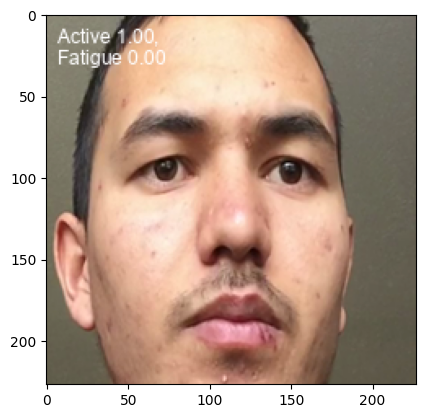

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
test = mpimg.imread('/kaggle/working/runs/classify/predict/r0264.png')
plt.imshow(test)

<a id="7"></a> 
## 7. Export Model
We trained our model and we want to run it on Android or Raspberry Pi. Most of the time we need our model to be tflite to run on these devices. So let's convert our model to tflite format. Remember we installed this *tensorflow==2.13.1* version to export without errors.

In [10]:
# Export the model
model.export(format='tflite')

Ultralytics YOLOv8.2.10 🚀 Python-3.10.13 torch-2.1.2 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/kaggle/working/runs/classify/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 2) (2.8 MB)
requirements: Ultralytics requirements ['onnx2tf>=1.15.4,<=1.17.5', 'sng4onnx>=1.0.1', 'onnxsim>=0.4.33', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.8/127.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 184.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 196.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 228.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 MB 250.7 MB/s eta 0:00:00
   ━━━━

100%|██████████| 1.11M/1.11M [00:00<00:00, 32.0MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /kaggle/working/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 48.92file/s]


ONNX: starting export with onnx 1.16.0 opset 17...


ONNX: simplifying with onnxsim 0.4.36...
ONNX: export success ✅ 0.6s, saved as '/kaggle/working/runs/classify/train/weights/best.onnx' (5.5 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.17.5...
TensorFlow SavedModel: export success ✅ 29.2s, saved as '/kaggle/working/runs/classify/train/weights/best_saved_model' (13.8 MB)

TensorFlow Lite: starting export with tensorflow 2.13.1...
TensorFlow Lite: export success ✅ 0.0s, saved as '/kaggle/working/runs/classify/train/weights/best_saved_model/best_float32.tflite' (5.5 MB)

Export complete (30.6s)
Results saved to /kaggle/working/runs/classify/train/weights
Predict:         yolo predict task=classify model=/kaggle/working/runs/classify/train/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=classify model=/kaggle/working/runs/classify/train/weights/best_saved_model/best_float32.tflite imgsz=640 data=/kaggle/input/driver-drowsiness/driver_drowsiness  
Visualize:       https://netron.ap

'/kaggle/working/runs/classify/train/weights/best_saved_model/best_float32.tflite'

<a id="8"></a> 
## 8. Acknowledgements
We trained our model with YOLOv8 pretrained classification model. This was a simple tutorial to show you how to train a detection model using YOLOv8. To keep learning I suggest you to look https://docs.ultralytics.com/. 